# Modeling Molecular Prientation From AR NEXAFS

This notebook is a simple example of how to model the molecular orientation of a molecule from the angle-resolved near-edge X-ray absorption fine structure (AR NEXAFS) spectrum. The AR NEXAFS spectrum is a measure of the absorption of X-rays by a molecule as a function of the incident angle of the X-rays. The absorption is sensitive to the orientation of the molecule with respect to the X-ray beam, and the AR NEXAFS spectrum can be used to determine the orientation of the molecule.


In [17]:
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import rc

font = {  #'family' : 'sans-serif',
    "sans-serif": "DejaVu Sans",
    "weight": "regular",
    "size": 14,
}
rc("font", **font)
plt.rcParams.update(
    {
        "axes.linewidth": 1.5,
        "xtick.major.size": 6,
        "xtick.major.width": 1.5,
        "ytick.major.size": 6,
        "ytick.major.width": 1.5,
        "xtick.direction": "in",
        "ytick.direction": "in",
        "legend.frameon": True,
        "legend.edgecolor": "black",
        "legend.fancybox": False,
    }
)

df = pl.read_csv(
    "C:/Users/hduva/.projects/pyref/pyref/docs/notebooks/optical models/allParamsSorted.txt",
    has_header=False,
)
df.columns = [
    "energy",
    "os",
    "wid",
    "mu_x",
    "mu_y",
    "mu_z",
    "theta",
    "sym",
    "xx",
    "yy",
    "zz",
    "xy",
    "xz",
    "yz",
    "atom",
    "mo",
    "_",
    "__",
]
df.drop(["_", "__"])

energy,os,wid,mu_x,mu_y,mu_z,theta,sym,xx,yy,zz,xy,xz,yz,atom,mo
f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,i64,i64,i64,i64
283.71094,0.002573,0.212314,0.007478,0.007478,0.999944,0.605872,1,1.4391e-7,1.4391e-7,0.002573,0,0,0,4,117
283.72656,0.002346,0.212314,0.007806,0.007806,0.999939,0.63242,1,1.4292e-7,1.4292e-7,0.002345,0,0,0,3,117
283.79688,0.00069,0.212314,0.00623,0.00623,0.9999612,0.504742,1,2.6765e-8,2.6765e-8,0.00069,0,0,0,5,117
283.79688,0.000613,0.212314,0.00072,0.00072,0.999999,0.059347,1,3.1793e-10,3.1793e-10,0.000613,0,0,0,7,117
283.82031,0.001113,0.212314,0.008591,0.008591,0.999926,0.69605,1,8.2135e-8,8.2135e-8,0.001113,0,0,0,2,117
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1312.9745,0.00003,5.0955415,0.707104,0.707104,0.002586,89.851822,1,0.000015,0.000015,1.9837e-10,0,0,0,5,846
1313.092,0.00003,5.0955415,0.7071023,0.7071023,0.00355,89.796631,1,0.000015,0.000015,3.7344e-10,0,0,0,7,846
1314.1169,0.000017,5.0955415,0.707102,0.707102,0.003605,89.793472,1,0.000009,0.000009,2.2552e-10,0,0,0,6,846


In [71]:
df.sort("atom")

energy,os,wid,mu_x,mu_y,mu_z,theta,sym,xx,yy,zz,xy,xz,yz,atom,mo,_,__
f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64
285.22656,0.006309,0.212314,0.004039,0.004039,0.999984,0.327456,1,1.0290e-7,1.0290e-7,0.006309,0,0,0,1,117,0,1
286.83038,0.001795,0.212314,0.004305,0.004305,0.999981,0.348866,1,3.3267e-8,3.3267e-8,0.001795,0,0,0,1,119,0,1
287.09988,0.001629,0.212314,0.004322,0.004322,0.999981,0.349986,1,3.0429e-8,3.0429e-8,0.001629,0,0,0,1,120,0,1
287.28098,0.000097,0.212314,0.004311,0.004311,0.9999814,0.349426,1,1.7951e-9,1.7951e-9,0.000097,0,0,0,1,121,0,1
287.40036,0.000088,0.212314,0.003247,0.003247,0.999989,0.263187,1,9.2308e-10,9.2308e-10,0.000088,0,0,0,1,122,0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
720.7135,0.00006,5.0955415,0.706528,0.706528,0.040464,87.680931,1,0.00003,0.00003,9.7465e-8,0,0,0,8,842,0,1
1166.4436,0.04534,5.0955415,0.00322,0.00322,0.99999,0.260947,1,4.7006e-7,4.7006e-7,0.045339,0,0,0,8,843,0,1
1168.9297,0.045069,5.0955415,0.70709,0.70709,0.006928,89.603027,1,0.022534,0.022534,0.000002,0,0,0,8,844,0,1


In [13]:
# calculate the mass absorbance from the tdm components and energy widths
import numpy as np
import numba as nb


@nb.jit(nopython=True)
def e_field(theta: float, phi: float):
    return np.array(
        [[np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)]]
    ).T


@nb.jit(nopython=True)
def gauss(x: np.ndarray, xc: float, wx: float):
    return np.exp(-((x - xc) ** 2) / (2 * wx**2)) / np.sqrt(2 * np.pi) / wx


@nb.jit(nopython=True)
def rot(x: float, y: float, z: float):
    return np.array(
        [
            [
                np.cos(y) * np.cos(z),
                np.cos(z) * np.sin(x) * np.sin(y) - np.cos(x) * np.sin(z),
                np.cos(x) * np.cos(z) * np.sin(y) + np.sin(x) * np.sin(z),
            ],
            [
                np.cos(y) * np.sin(z),
                np.cos(x) * np.cos(z) + np.sin(x) * np.sin(y) * np.sin(z),
                -np.cos(z) * np.sin(x) + np.cos(x) * np.sin(y) * np.sin(z),
            ],
            [-np.sin(y), np.cos(y) * np.sin(x), np.cos(x) * np.cos(y)],
        ]
    )


def mass_absorbance(mu: np.ndarray, theta: float, phi: float, alpha: float = 0):
    # Average the mass absorbance over all directions
    # mu_avg = (
    #     mu
    #     + rot(0, 0, np.pi / 2).T @ mu @ rot(0, 0, np.pi / 2)
    #     + rot(0, 0, np.pi).T @ mu @ rot(0, 0, np.pi)
    #     + rot(0, 0, 2 * np.pi / 2).T @ mu @ rot(0, 0, 2 * np.pi / 2)
    # ) / 4

    # Tilt the molecule by alpha
    # mu = rot(0, 0, alpha).T @ mu_avg @ rot(0, 0, alpha)
    return (e_field(theta, phi).T @ mu @ e_field(theta, phi))[0, 0]


def tdm_matrix(df: pl.DataFrame):
    mu = np.array(
        [
            [df["xx"], df["xy"], df["xz"]],
            [df["xy"], df["yy"], df["yz"]],
            [df["xz"], df["yz"], df["zz"]],
        ]
    )
    print(df["os"][0])
    print(
        2
        / 3
        * df["energy"][0]
        * (df["xx"][0] ** 2 + df["yy"][0] ** 2 + df["zz"][0] ** 2)
    )
    return mu


mu = tdm_matrix(df)[:, :, 0]
print(mu)
ma = mass_absorbance([mu], np.pi / 2, 0, 0)
print(ma)

0.002573
0.0012523188935267243
[[1.4390905e-07 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.4390905e-07 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.5731497e-03]]
[1.4390905e-07]


In [14]:
import matplotlib.pyplot as plt

magic_angle = np.deg2rad(54.7)


def get_ma(
    df: pl.DataFrame, theta: float = magic_angle, phi: float = 0, alpha: float = 0
):
    mu = tdm_matrix(df)
    # iterate over the chunks of the mu ndarray
    e = np.linspace(280, 300, 10000)
    ma = []
    for i in range(mu.shape[2]):
        ma.append(mass_absorbance(mu[:, :, i], theta, phi, alpha))
    new_df = pl.DataFrame(
        {
            "energy": df["energy"],
            "ma": pl.Series(ma),
            "width": df["wid"],
            "atom": df["atom"],
        }
    )
    return new_df.sort(["atom"])


ma_df = get_ma(df)

0.002573
0.0012523188935267243


(0.0, 0.009)

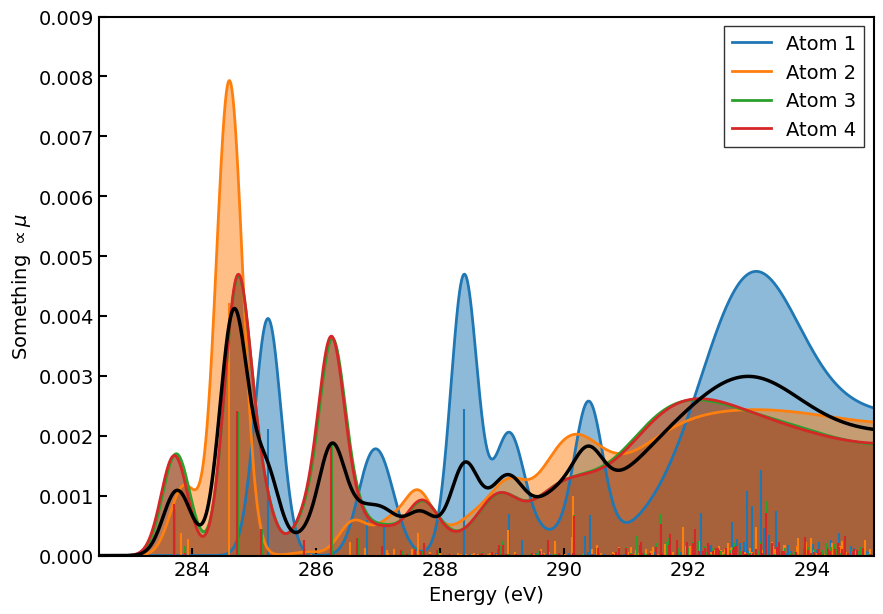

In [18]:
from scipy.stats import cauchy

atoms = ma_df["atom"].unique()
e = np.linspace(280, 300, 10000)
fig, ax = plt.subplots(figsize=(10, 7))
mu = 0
for atom in atoms:
    if atom == 5:
        break
    atom_df = ma_df.filter(pl.col("atom") == atom)
    atom_mu = 0
    for row in atom_df.iter_rows():
        atom_mu += row[1] * gauss(e, row[0], row[2])
        # atom_mu += row[1] * cauchy.pdf(e, row[0], row[2])
        ax.vlines(row[0], 0, row[1], color=f"C{atom-1}")
    mu += atom_mu
    ax.fill_between(e, atom_mu, alpha=0.5)
    ax.plot(e, atom_mu, label=f"Atom {atom}", linewidth=2)
ax.legend()
ax.plot(e, mu / 4, label="Total", color="black", linewidth=2.5)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel(r"Something $\propto\mu$")
ax.set_xlim(282.5, 295)
ax.set_ylim(0, 0.009)

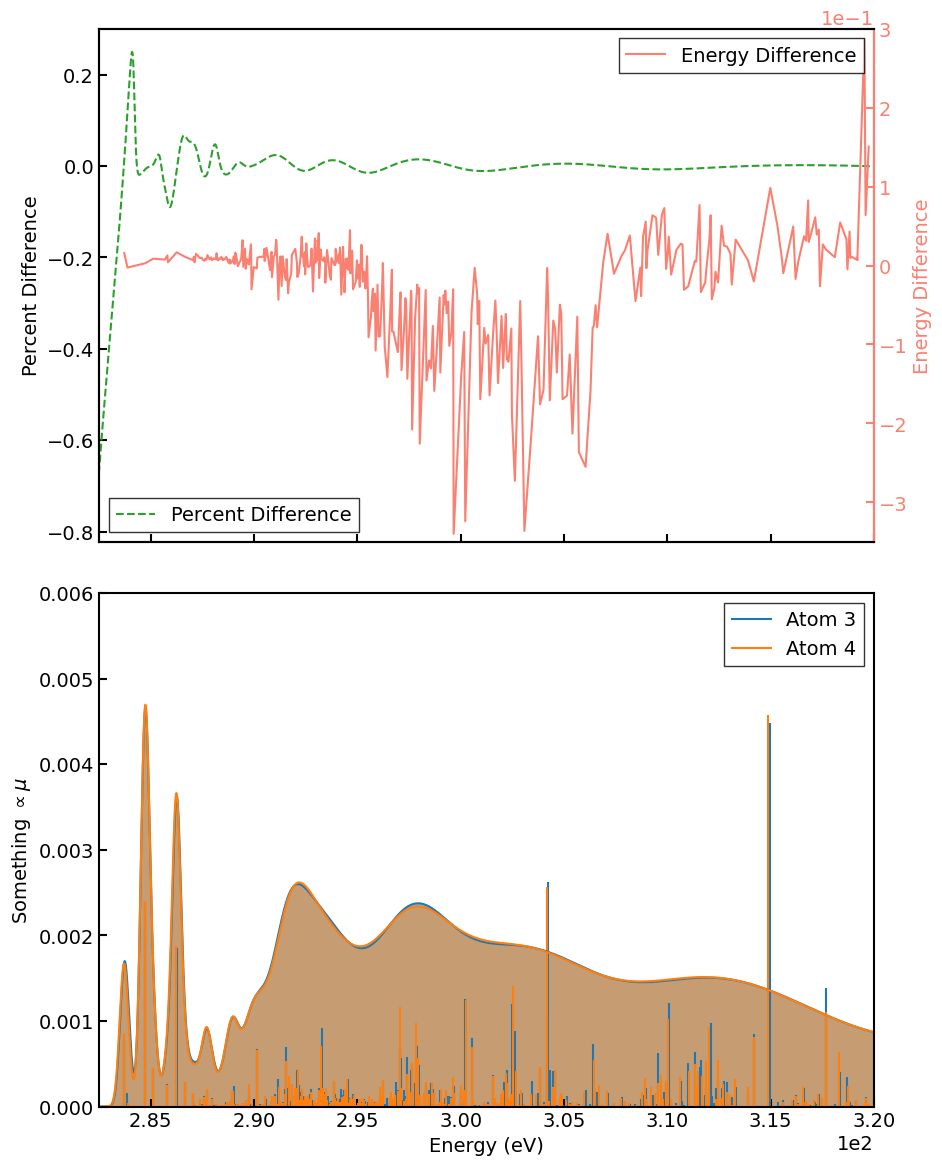

In [19]:
# just 3 and 4
fig, ax = plt.subplots(
    nrows=2, sharex=True, figsize=(10, 14), gridspec_kw={"hspace": 0.1}
)

a3 = ma_df.filter(pl.col("atom") == 3)
a4 = ma_df.filter(pl.col("atom") == 4)

a3_mu = 0
a4_mu = 0
e = np.linspace(280, 320, 10000)

for row in a3.iter_rows():
    a3_mu += row[1] * gauss(e, row[0], row[2])
    ax[1].vlines(row[0], 0, row[1], color="C0")
ax[1].fill_between(e, a3_mu, alpha=0.5)

for row in a4.iter_rows():
    a4_mu += row[1] * gauss(e, row[0], row[2])
    ax[1].vlines(row[0], 0, row[1], color="C1")
ax[1].fill_between(e, a4_mu, alpha=0.5)

percent_diff = (a3_mu - a4_mu) / a3_mu
ax[0].plot(e, percent_diff, label="Percent Difference", linestyle="--", color="C2")
ax[0].set_ylabel("Percent Difference")
ax[0].legend(loc="lower left")

# calculate the percent difference between the energies of two transitions
# and plot that using the right axis
# find the number of transitions below 300 eV
n = a3.filter(pl.col("energy") < 320).height
ax2 = ax[0].twinx()
energy_diff = a3["energy"][:n] - a4["energy"][:n]
ax2.plot(a3["energy"][:n], energy_diff, label="Energy Difference", color="salmon")
ax2.set_ylabel("Energy Difference")
ax2.legend(loc="upper right")
ax2.set_ylim(-0.35, 0.3)
ax2.yaxis.label.set_color("salmon")
ax2.tick_params(axis="y", colors="salmon")
ax2.spines["right"].set_color("salmon")
plt.gca().ticklabel_format(scilimits=(0, 0))

ax[1].plot(e, a3_mu, label="Atom 3")
ax[1].plot(e, a4_mu, label="Atom 4")
ax[1].legend()
ax[1].set_xlim(282.5, 320)
ax[1].set_ylim(0, 0.006)
ax[1].set_xlabel("Energy (eV)")
ax[1].set_ylabel(r"Something $\propto\mu$")
plt.show()